In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
import pandas as pd
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return np.loadtxt(fullpath,delimiter=',')

def getScales(X,Y):
    distances = np.sqrt(np.power(X-5,2)+np.power(Y-5,2))
    scalefactor = 2.0/(1.0+np.exp(-2*distances))-0.99;
    return scalefactor

In [3]:
hvac_heuristic = ReadData('../HVAC_PLOT_SOURCE/HVAC_INTERM_Heuristic.csv')
hvac_tensorflow = ReadData('../HVAC_PLOT_SOURCE/HVAC_INTERM_Tensorflow.csv')

In [4]:
def get_frame(data):
    row,column = data.shape
    new_data = []
    for i in range(row-1):
        level=0
        for j in range(column):
            #if j%12 == 0:
                #level+=1
            #room = j%12
            new_data.append([int(i),int(j+1),data[i,j]])
    return pd.DataFrame(np.array(new_data),columns=['Horizon','Room','Temperature'])

In [5]:
heuristic = get_frame(hvac_heuristic)
heuristic.Time_Step = heuristic.Horizon.astype(int)
heuristic.Room = heuristic.Room.astype(int)
heuristic=heuristic[heuristic['Horizon']<19]
tensorflow = get_frame(hvac_tensorflow)
tensorflow.Time_Step = tensorflow.Horizon.astype(int)
tensorflow.Room = tensorflow.Room.astype(int)
tensorflow=tensorflow[tensorflow['Horizon']<19]

In [6]:
heuristic['Method'] = 'Heuristic'
tensorflow['Method'] = 'Tensorflow'
df=pd.concat([tensorflow,heuristic])
df['Horizon'] =df['Horizon'].astype(int)
df

,Horizon,Room,Temperature,Method
0,0,1,16.141699,Tensorflow
1,0,2,15.094077,Tensorflow
2,0,3,13.692883,Tensorflow
3,0,4,11.688655,Tensorflow
4,0,5,15.771189,Tensorflow
5,0,6,13.014193,Tensorflow
6,0,7,13.465158,Tensorflow
7,0,8,14.536101,Tensorflow
8,0,9,13.000879,Tensorflow
9,0,10,15.431140,Tensorflow


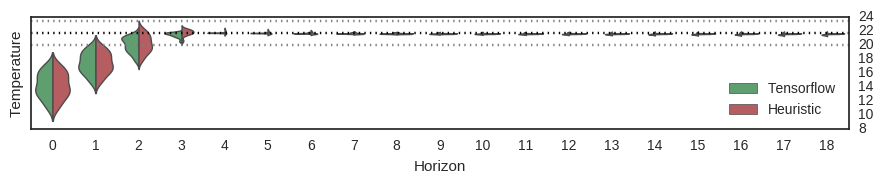

In [7]:
sns.set(style="white")
current_palette = sns.color_palette()
fig,ax = plt.subplots(figsize=(9, 2), dpi=100)
ax.set_autoscaley_on(True)
ax.yaxis.tick_right()
sns.violinplot(x="Horizon", y="Temperature",size=1,hue="Method",palette=current_palette[1:],split=True,linewidth=1, inner=None, data=df)
ax.axhline(y=21.75,ls=":", c="k")
ax.axhline(y=23.5,ls=":", c="0.5")
ax.axhline(y=20.0,ls=":", c="0.5")
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig('../PLOTS/hvac_tensorflow_heuristic_violin.eps',format='eps')

In [8]:
#df_time=df[df['Time_Step']==7.0]
#temp=df_time.pivot("Level", "Room", "Temperature")

In [9]:
#sns.heatmap(temp,annot=True, linewidths=.5,fmt='2.2f',vmin=0, vmax=30, square=True)

In [10]:
# sns.set(style="white",  palette="colorblind", color_codes=True)
# grid = sns.FacetGrid(df, col="Room", hue="Method", palette={"Tensorflow": "b", "Heuristic": "r"},col_wrap=12, size=1.5)
# # Draw a horizontal line to show the starting point
# grid.map(plt.axhline, y=21.75, ls=":", c=".5")
# # Draw a line plot to show the trajectory of each random walk
# grid.map(plt.plot, "Horizon", "Temperature")

# # Adjust the tick positions and labels
# grid.set(xticks=[0,18], yticks=[0,30],
#          xlim=(-.5, 19.5), ylim=(0, 30))

# # Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)
# plt.savefig('../PLOTS/hvac_tensorflow_heuristic_facet.eps',format='eps')

In [11]:
hvac_reward_heuristic = ReadData('../HVAC_PLOT_SOURCE/HVAC_REWARD_Heuristic.csv')
hvac_reward_tensorflow = ReadData('../HVAC_PLOT_SOURCE/HVAC_REWARD_Tensorflow.csv')

In [12]:
def get_reward_frame(data):
    row = len(data)
    new_data = []
    for i in range(1,row):
        new_data.append([int(i), -data[i]])
    return pd.DataFrame(np.array(new_data),columns=['Horizon','Loss'])

In [13]:
reward_heuristic = get_reward_frame(hvac_reward_heuristic)
reward_tensorflow = get_reward_frame(hvac_reward_tensorflow)

In [14]:
reward_heuristic['Method'] = 'Heuristic'
reward_tensorflow['Method'] = 'Tensorflow'

In [15]:
reward_heuristic.Time_Step = reward_heuristic.Horizon.astype(int)
reward_tensorflow.Time_Step = reward_tensorflow.Horizon.astype(int)

In [16]:
df_reward=pd.concat([reward_tensorflow,reward_heuristic])
df_reward['Horizon'] =df_reward['Horizon'].astype(int)
df_reward.head()

,Horizon,Loss,Method
0,1,1.183161e+06,Tensorflow
1,2,5.614104e+05,Tensorflow
2,3,2.856009e+02,Tensorflow
3,4,4.497583e+01,Tensorflow
4,5,5.075661e+01,Tensorflow


/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


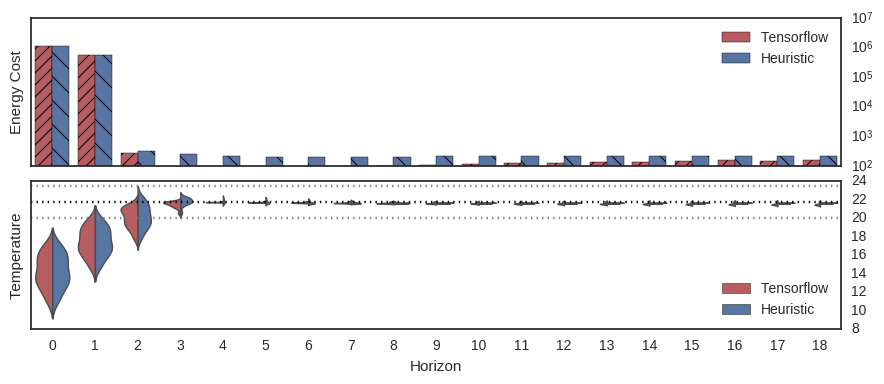

In [17]:
#sns.set(style="white",  palette="colorblind", color_codes=True)
current_palette = sns.color_palette()
current_palette[1] =current_palette[0]
current_palette[0] =current_palette[2]
fig,(ax1,ax2) = plt.subplots(2,figsize=(9, 4), dpi=100)
ax1.set_yscale('log')
ax1.yaxis.tick_right()
sns.barplot(x="Horizon", y="Loss", hue="Method", ax=ax1,palette=current_palette,data=df_reward)
ax1.set_ylabel("Energy Cost")
ax1.get_xaxis().set_visible(False)
ax1.legend(loc='upper right')
hatches = ['//','\\']
for i,thisbar in enumerate(ax1.patches):
    if(i<19):
        thisbar.set_hatch(hatches[0])
    else:
        thisbar.set_hatch(hatches[1])
ax2.set_autoscaley_on(True)
ax2.yaxis.tick_right()
sns.violinplot(x="Horizon", y="Temperature",size=1,hue="Method",ax=ax2,palette=current_palette,split=True,linewidth=1, inner=None, data=df)
ax2.axhline(y=21.75,ls=":", c="k")
ax2.axhline(y=23.5,ls=":", c="0.5")
ax2.axhline(y=20.0,ls=":", c="0.5")
ax2.legend(loc='lower right')
plt.tight_layout()
plt.subplots_adjust(hspace = 0.1)
plt.savefig('../PLOTS/hvac_tensorflow_heuristic_action.eps',format='eps')